In [1]:
#https://www.kaggle.com/c/nlp-getting-started/data
import pandas as pd

In [2]:
test= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/test.csv")
train= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/train.csv")

In [3]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train['location']=train['location'].fillna('')
train['keyword']=train['keyword'].fillna('')

In [6]:
train['keyword'].value_counts()

                         61
fatalities               45
armageddon               42
deluge                   42
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [7]:
train['location'].value_counts()

                              2533
USA                            104
New York                        71
United States                   50
London                          45
                              ... 
LA                               1
Host of #MindMoversPodcast       1
BiÌ±an,Laguna                    1
IRAQ                             1
 Neverland                       1
Name: location, Length: 3342, dtype: int64

In [8]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gauravtyagi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import matplotlib.pyplot as plt

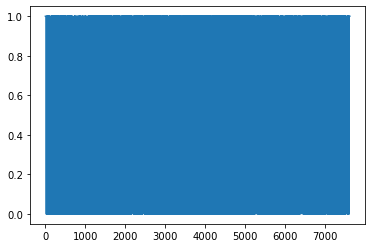

In [12]:
train['target'].plot(x="target", y=["1", "0"])
plt.show()

In [13]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gauravtyagi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import string

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gauravtyagi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gauravtyagi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def process_data(tweet):
    
    #make tweet in lower cases 
    tweet = tweet.lower()
    
    # remove urls
    tweet= re.sub(r"http\S+|www\S+|https\S+","",tweet,flags=re.MULTILINE)
    
    # remove punctuation 
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    
    # remove user @ and #
    tweet = re.sub(r'\@\w+|\#',"",tweet)
    
    # remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    # Stemming 
    ps = PorterStemmer()
    stemmed_word = [ps.stem(w) for w in filtered_words]
    
    # lemmatizing 
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w , pos='a') for w in stemmed_word]
    
    return " ".join(lemma_words)

In [17]:
process_data("Hi There , you are dsnvkdnvkdsnkv")

'hi dsnvkdnvkdsnkv'

In [18]:
train['text'] = train['text'].apply(process_data)  

In [19]:
train.head(5)

,id,keyword,location,text,target
0,1,,,deed reason earthquak may allah forgiv us,1
1,4,,,forest fire near la rong sask canada,1
2,5,,,resid ask shelter place notifi offic evacu she...,1
3,6,,,13000 peopl receiv wildfir evacu order california,1
4,7,,,got sent photo rubi alaska smoke wildfir pour ...,1


In [20]:
test['text'] = test['text'].apply(process_data)  

In [21]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill 28 china taiwan


In [22]:
test['location']=test['location'].fillna('')
test['keyword']=test['keyword'].fillna('')

In [23]:
test.head(5)

,id,keyword,location,text
0,0,,,happen terribl car crash
1,2,,,heard earthquak differ citi stay safe everyon
2,3,,,forest fire spot pond gees flee across street ...
3,9,,,apocalyps light spokan wildfir
4,11,,,typhoon soudelor kill 28 china taiwan
